In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text

In [ ]:
data = pd.read_csv('mushroom1.csv')

##**Model Selection**

In [ ]:
#use decision tree

##**Model Training**

In [ ]:
#split the data into training and testing sets (80/20)

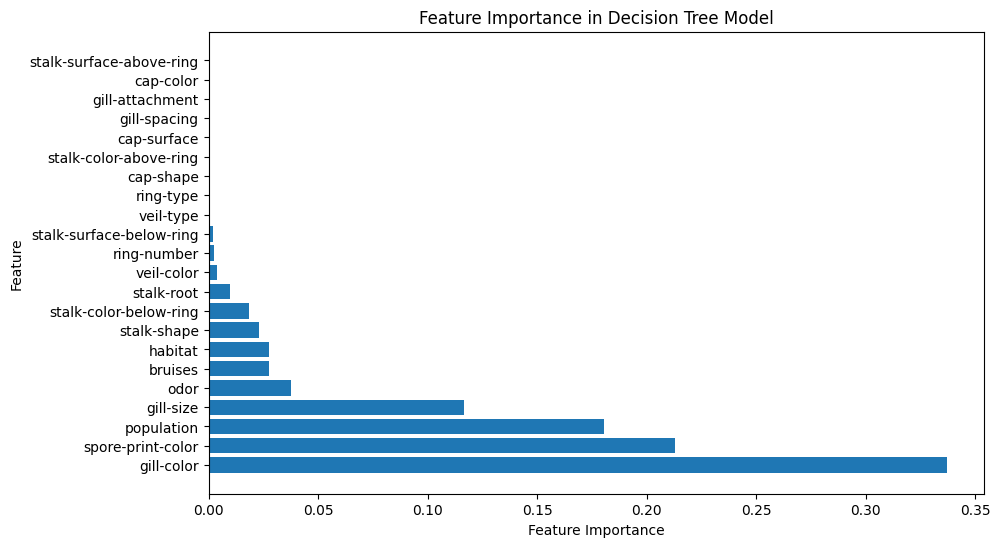

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Separate features and target
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the feature importance scores from the trained model
importances = model.feature_importances_

# Get the feature names (columns in the dataset)
feature_names = X.columns

# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


This code demonstrates the process of training and testing a Decision Tree Classifier. First, the dataset is prepared by separating the features and the target variable. The features, stored in `X`, are extracted by dropping the `class` column, while the target variable, `y`, contains the values of the `class` column. Next, the dataset is split into training and testing sets using the `train_test_split` function. Here, 80% of the data is allocated for training and 20% for testing, as specified by the `test_size=0.2` parameter. To ensure reproducibility of the split, a random seed is set using `random_state=42`.

After splitting the data, a Decision Tree Classifier is initialized with `random_state=42` to maintain consistency in model behavior. The training process begins by fitting the model to the training data (`X_train` and `y_train`) using the `fit` method, allowing the model to learn patterns and relationships in the data. Once the model is trained, it is tested on the unseen test data (`X_test`) by using the `predict` method, which generates predictions stored in `y_pred`. This workflow highlights the key steps in building, training, and evaluating a machine learning model.



##**Model Evaluation**

In [ ]:
# Evaluate the performance of your model using metrics like accuracy, precision, recall, and F1 score.
# Since this is a classification task, confusion matrix can also be helpful.
#You can use cross-validation for more robust evaluation.

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



This code evaluates the performance of a trained Decision Tree Classifier on the test dataset using metrics such as accuracy and a classification report.

First, the model's accuracy is calculated using the `accuracy_score` function, which compares the actual target values (`y_test`) with the predicted values (`y_pred`) and computes the proportion of correctly predicted instances. The result is stored in the `accuracy` variable and printed to two decimal places using an f-string for formatting. Accuracy provides a quick measure of how well the model performs overall but may not capture detailed performance nuances, especially with imbalanced datasets.

Next, a classification report is generated using the `classification_report` function, which provides a more comprehensive evaluation of the model. The report includes metrics such as precision, recall, and F1-score for each class, offering insights into how well the model performs for each category. Precision measures the proportion of correct positive predictions, recall quantifies the ability to identify all positive instances, and the F1-score balances precision and recall. The report also provides support, indicating the number of instances for each class in the test set.

Together, these metrics give a detailed view of the classifier's strengths and weaknesses, helping to assess its effectiveness and identify areas for potential improvement.

In [ ]:
#doing a cross validation for more robust evalution incase of overfitting
from sklearn.model_selection import cross_val_score
# Separate features and target
X = data.drop(columns=['class'])
y = data['class']

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [0.88184615 1.         1.         1.         0.92610837]
Mean Accuracy: 0.96
Standard Deviation: 0.05


The cross-validation results indicate the following:

1. **Accuracy Scores**:  
   The accuracy for each fold of the 5-fold cross-validation is:
   - Fold 1: 88.18%
   - Fold 2: 100%
   - Fold 3: 100%
   - Fold 4: 100%
   - Fold 5: 92.61%

   These scores suggest that the model performs well across most folds, but Fold 1 has a notably lower accuracy, indicating potential variability in the data distribution or performance.

2. **Mean Accuracy**:  
   The average accuracy across all folds is **96%**. This high mean accuracy shows that the model is generally effective at classifying the data.

3. **Standard Deviation**:  
   The standard deviation of **0.05** (5%) indicates some variability in the model’s performance across folds. While this isn't excessively high, it suggests that the model may struggle with certain subsets of the data.

### Interpretation:
- The high average accuracy indicates that the model is performing well overall.  
- The perfect accuracy in multiple folds (100%) might imply that those subsets of the data are easier to classify.
- The drop in accuracy in Fold 1 might warrant further investigation to check for:
  - Imbalances or inconsistencies in the data.
  - The presence of harder-to-classify patterns in that specific fold.

### Next Steps:
1. **Analyze Fold 1 Data**: Examine the subset of data used in Fold 1 to identify any anomalies, outliers, or challenging patterns.
2. **Stratified Cross-Validation**: Ensure that the splits maintain the proportion of class labels using `StratifiedKFold` (default in `cross_val_score` for classifiers). This is especially important if your dataset is imbalanced.
3. **Hyperparameter Tuning**: Adjust the Decision Tree parameters (e.g., `max_depth`, `min_samples_split`) to see if it improves performance consistency.